<a href="https://colab.research.google.com/github/himeshps/Tidal_Volume_Submission_230478/blob/main/TidalVolume_Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Importing the required python libraries, my approach is to find the best fitting model out of the ones mentioned.
#The models that I have used in this notebook are Linear Regression, Support Vector Machine, Gradient Booster Regression, Random Forest Regression.
#I have individually tested all the models and chosen the best one.

#This codeblock is specifically importing for linear regression.

# The above comments have been copied from my previous 'rough working' models so please don't mind that.

# The boring importing step but it is crucial.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [23]:
# Mounting the google drive to import the dataset.
#I will be leaving the link to the drive on readme commit of the repo for verification purposes.

df = pd.read_csv('/content/drive/MyDrive/TidalVolumeTask_PClub_Recruitment/FinalCombinedDataset.csv')

# Separating the features used for prediction and the target variable

X = df[['age', 'height','chest_circumference', 'BodyMassIndex','weight','gender']]
y = df['tidal_volume']

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

#Feature Scaling
scaler = StandardScaler()

# Works on data transformation here using the scaling method. Cool until now!
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Implementing Linear Regression model on the scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Final Predictions delivered (more like stored )
y_pred = model.predict(X_val_scaled)

In [25]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
mae = mean_absolute_error(y_val, y_pred)

print("Mean Absolute Error:", mae)

 # These are the metrics which would give an idea as to how accurate and reliable my model is. More comments in the README.

Mean Squared Error: 879.5097062078211
R-squared: 0.7479632764115479
Mean Absolute Error: 23.349381072219362


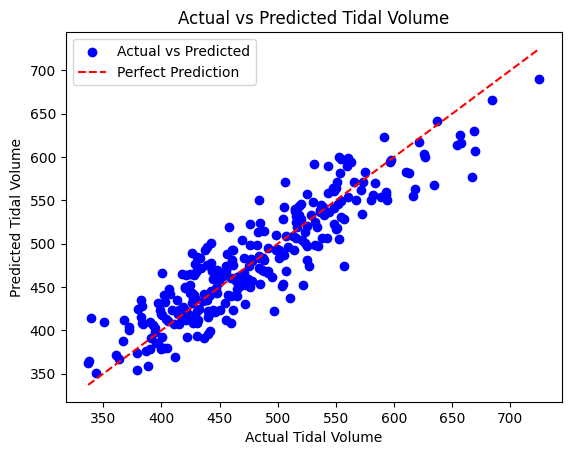

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Done this step already but I worked it out again just for the purpose of presenting the code well
model = LinearRegression()
model.fit(X, y)

# Making the predictions, decisive times/computations ahead no ?
y_pred = model.predict(X)

# Plotting the actual/derived data points.
plt.scatter(y, y_pred, color='blue', label='Actual vs Predicted')

# The regression line is plotted here, which is indicative of what a perfect prediction looks like
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', label='Perfect Prediction')

# Taking care of the labels and title
plt.xlabel('Actual Tidal Volume')
plt.ylabel('Predicted Tidal Volume')
plt.title('Actual vs Predicted Tidal Volume')
plt.legend()

# Pictoral Representation FINALLYY
plt.show()


In [27]:
def take_input():
    age = int(input("Enter age: "))
    height = int(input("Enter height in cm: "))
    chest_circumference = int(input("Enter chest circumference in cm: "))
    BodyMassIndex = float(input("Enter BMI: "))
    weight=float(input("Enter weight:"))
    gender=int(input("Enter Gender: \n Kindly enter 0 for female and 1 for male "))

    return {'age': [age], 'height': [height],
            'chest_circumference': [chest_circumference], 'BodyMassIndex': [BodyMassIndex], 'weight' : [weight], 'gender' : [gender]}

#Into the hands of the user i.e., you now lol.

print("\nEnter new data for prediction:")
new_data = take_input()

# I have formed the data frame in this step here
new_df = pd.DataFrame(new_data)

# BOOM ! Here goes my prediction
predicted_tidal_volume = model.predict(new_df)
print(f'Predicted Tidal Volume: {predicted_tidal_volume[0]} ml')


Enter new data for prediction:
Enter age: 18
Enter height in cm: 170
Enter chest circumference in cm: 102
Enter BMI: 20
Enter weight:58
Enter Gender: 
 Kindly enter 0 for female and 1 for male 1
Predicted Tidal Volume: 504.11055338226834 ml
